#  Clustering (K Means and Agglomerative) on US Crime Data

**Objective**: Group US states based on crime data using K-means clustering algorithm and then compare the results with Hierarchical Agglomerative Clustering algorithm.

**Data Source**: 50 US states crime [dataset](https://rdrr.io/r/datasets/USArrests.html) will be used.



## The Data

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

-	Murder	numeric	Murder arrests (per 100,000)
-	Assault	numeric	Assault arrests (per 100,000)
-	UrbanPop	numeric	Percent urban population
-	Rape	numeric	Rape arrests (per 100,000)


## Import Libraries

** Import the commonly used libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

** Read in the data file using read_csv. Set states column as the index.**

In [2]:
df = pd.read_csv('crime_data.csv')

In [3]:
df['Total'] = df['Murder'] + df['Assault'] + df['Rape']

In [4]:
df.head()

,State,Murder,Assault,UrbanPop,Rape,Total
0,Alabama,13.2,236,58,21.2,270.4
1,Alaska,10.0,263,48,44.5,317.5
2,Arizona,8.1,294,80,31.0,333.1
3,Arkansas,8.8,190,50,19.5,218.3
4,California,9.0,276,91,40.6,325.6


** Check the info() and describe() methods on the data.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
State       50 non-null object
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
Total       50 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.4+ KB


In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,199.780000
std,4.35551,83.337661,14.474763,9.366385,93.372967
min,0.80000,45.000000,32.000000,7.300000,53.100000
25%,4.07500,109.000000,54.500000,15.075000,128.250000
50%,7.25000,159.000000,66.000000,20.100000,185.200000
75%,11.25000,249.000000,77.750000,26.175000,285.800000
max,17.40000,337.000000,91.000000,46.000000,382.300000


There is no missing data in the dataset.

## EDA

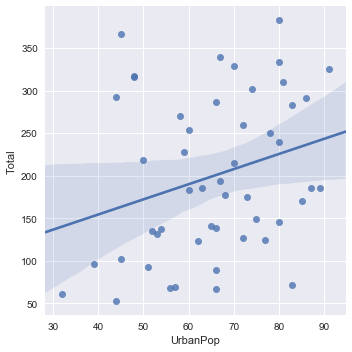

In [7]:
sns.lmplot(data=df,x='UrbanPop',y='Total')

Although the points are scattered across but we can see an upward trend in crimes reported with increase in Urbanization.

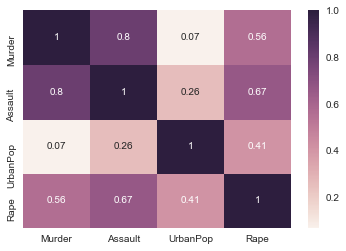

In [8]:
sns.heatmap(df.drop('Total',axis=1).corr(),annot=True)

**Inference: **Assault and Murder are highly correlated crimes.

## Data Standardization

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(df[['Murder','Rape','Assault']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_data = scaler.transform(df[['Murder','Rape','Assault']])

In [12]:
scaled_data.shape

(50, 3)

In [13]:
scaled_data

array([[ 1.25517927, -0.00345116,  0.79078716],
       [ 0.51301858,  2.50942392,  1.11805959],
       [ 0.07236067,  1.05346626,  1.49381682],
       [ 0.23470832, -0.18679398,  0.23321191],
       [ 0.28109336,  2.08881393,  1.2756352 ],
       [ 0.02597562,  1.88390137,  0.40290872],
       [-1.04088037, -1.09272319, -0.73648418],
       [-0.43787481, -0.58583422,  0.81502956],
       [ 1.76541475,  1.1505301 ,  1.99078607],
       [ 2.22926518,  0.49265293,  0.48775713],
       [-0.57702994, -0.11129987, -1.51224105],
       [-1.20322802, -0.75839217, -0.61527217],
       [ 0.60578867,  0.29852525,  0.94836277],
       [-0.13637203, -0.0250209 , -0.70012057],
       [-1.29599811, -1.07115345, -1.39102904],
       [-0.41468229, -0.34856705, -0.67587817],
       [ 0.44344101, -0.53190987, -0.74860538],
       [ 1.76541475,  0.10439756,  0.94836277],
       [-1.31919063, -1.44862395, -1.06375661],
       [ 0.81452136,  0.70835037,  1.56654403],
       [-0.78576263, -0.53190987, -0.263

## K Means Cluster Creation

Now it is time to create the Cluster labels!

** Import KMeans from SciKit Learn.**

In [14]:
from sklearn.cluster import KMeans

**Finding the optimal number of clusters using Elbow method**

In [15]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  kmeans_index = KMeans( num_clusters )
  kmeans_index.fit( scaled_data )
  cluster_errors.append( kmeans_index.inertia_ )

In [16]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [17]:
clusters_df[0:10]

,cluster_errors,num_clusters
0,150.000000,1
1,56.289522,2
2,41.995889,3
3,28.415774,4
4,24.936205,5
5,21.840313,6
6,19.568150,7
7,16.506024,8
8,14.870553,9


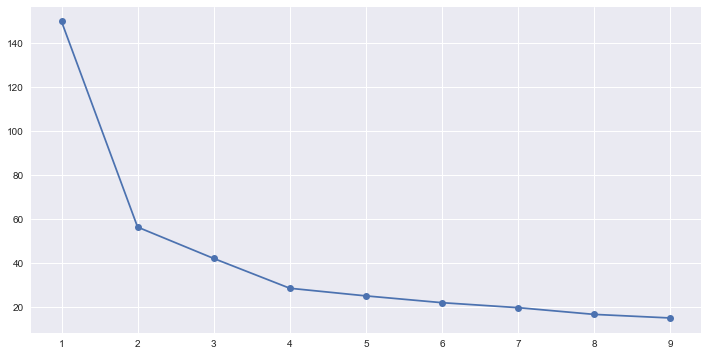

In [79]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

**Elbow method conclusion**

If you look at the above figure, there is a clear bend of arm at cluster count 2 and then the next significant bend is at 4 although 2 of the groups have hardly any difference in slope (between 2 and 4). Lets cluster the data in 4 groups.

** Create an instance of a K Means model with 4 clusters.**

In [19]:
kmeans = KMeans(n_clusters=4)

**Fit the model to the scaled data.**

In [20]:
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

** cluster center vectors**

In [21]:
kmeans.cluster_centers_

array([[-0.27825569, -0.12462236, -0.30297299],
       [ 1.3556802 ,  0.29043659,  1.05947378],
       [ 0.5362111 ,  1.83922119,  1.09728039],
       [-1.09223524, -1.01722909, -1.08886481]])

In [22]:
kmeans.labels_

array([1, 2, 2, 0, 2, 2, 3, 0, 1, 1, 3, 3, 1, 0, 3, 0, 0, 1, 3, 1, 0, 2, 3,
       1, 0, 0, 3, 2, 3, 0, 2, 1, 1, 3, 0, 0, 0, 0, 3, 1, 3, 1, 1, 0, 3, 0,
       0, 3, 3, 0])

In [23]:
df['Cluster'] = kmeans.labels_

In [24]:
df.head()

,State,Murder,Assault,UrbanPop,Rape,Total,Cluster
0,Alabama,13.2,236,58,21.2,270.4,1
1,Alaska,10.0,263,48,44.5,317.5,2
2,Arizona,8.1,294,80,31.0,333.1,2
3,Arkansas,8.8,190,50,19.5,218.3,0
4,California,9.0,276,91,40.6,325.6,2


In [25]:
df.groupby('Cluster').size()

Cluster
0    17
1    12
2     7
3    14
dtype: int64

In [26]:
df.groupby('Cluster').mean()

,Murder,Assault,UrbanPop,Rape,Total
Cluster,,,,,
0,6.588235,145.764706,68.235294,20.076471,172.429412
1,13.633333,258.166667,64.666667,23.925000,295.725000
2,10.100000,261.285714,74.571429,38.285714,309.671429
3,3.078571,80.928571,58.500000,11.800000,95.807143


Group 1 and 2 have very similar crime rates (except Rapes reported), so they will be clubbed into one cluster.

In [27]:
df.loc[:, 'Cluster'].replace([2,3], [1,2], inplace=True)

In [28]:
df.groupby('Cluster').size()

Cluster
0    17
1    19
2    14
dtype: int64

In [29]:
df.groupby('Cluster').mean()

,Murder,Assault,UrbanPop,Rape,Total
Cluster,,,,,
0,6.588235,145.764706,68.235294,20.076471,172.429412
1,12.331579,259.315789,68.315789,29.215789,300.863158
2,3.078571,80.928571,58.500000,11.800000,95.807143


**Cluster Classification**

- 2: Low crime zone states
- 0: Medium crime zone states
- 1: High crime zone states

In [40]:
df.loc[:, 'Cluster'].replace([0,1,2], ['Medium','High','Low'], inplace=True)

In [41]:
df.head()

,State,Murder,Assault,UrbanPop,Rape,Total,Cluster,Cluster_H
0,Alabama,13.2,236,58,21.2,270.4,High,0
1,Alaska,10.0,263,48,44.5,317.5,High,3
2,Arizona,8.1,294,80,31.0,333.1,High,0
3,Arkansas,8.8,190,50,19.5,218.3,Medium,1
4,California,9.0,276,91,40.6,325.6,High,3


## Hierarchical Clustering

Now lets try to cluster our data using the hierarchical clustering approach.

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
ward = AgglomerativeClustering(n_clusters=4, linkage='ward').fit(scaled_data)

In [35]:
df['Cluster_H'] = ward.labels_

In [36]:
df.head()

,State,Murder,Assault,UrbanPop,Rape,Total,Cluster,Cluster_H
0,Alabama,13.2,236,58,21.2,270.4,1,0
1,Alaska,10.0,263,48,44.5,317.5,1,3
2,Arizona,8.1,294,80,31.0,333.1,1,0
3,Arkansas,8.8,190,50,19.5,218.3,0,1
4,California,9.0,276,91,40.6,325.6,1,3


In [37]:
df.groupby('Cluster_H').size()

Cluster_H
0    16
1    19
2    11
3     4
dtype: int64

In [39]:
df.groupby('Cluster_H').mean()

,Murder,Assault,UrbanPop,Rape,Total,Cluster
Cluster_H,,,,,,
0,12.762500,256.875000,66.875000,25.843750,295.481250,0.937500
1,6.105263,138.000000,69.578947,18.847368,162.952632,0.315789
2,2.736364,73.727273,53.363636,10.927273,87.390909,2.000000
3,9.775000,248.750000,74.500000,42.450000,300.975000,1.000000


Merging cluster 0 and 3 as they have similar data and also categorize them as high medium and low crime rate zones.

In [43]:
df.loc[:, 'Cluster_H'].replace([0,1,2,3], ['High','Medium','Low','High'], inplace=True)

**The results from KMeans and Hierarchical clustering are quite similar except in few states. Refer to the table towards end of the page.**

### Now using Hierarchical Agglomerative Clustering with 3 cluster count

In [58]:
ward_c3 = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(scaled_data)
df['Cluster_H_c3'] = ward_c3.labels_

In [59]:
df.groupby('Cluster_H_c3').size()

Cluster_H_c3
0    20
1    19
2    11
dtype: int64

In [60]:
df.groupby('Cluster_H_c3').mean()

,Murder,Assault,UrbanPop,Rape,Total
Cluster_H_c3,,,,,
0,12.165000,255.250000,68.400000,29.165000,296.580000
1,6.105263,138.000000,69.578947,18.847368,162.952632
2,2.736364,73.727273,53.363636,10.927273,87.390909


In [61]:
df.loc[:, 'Cluster_H_c3'].replace([0,1,2], ['High','Medium','Low'], inplace=True)

In [78]:
df.sort_values('Cluster_Kmeans')

,State,Murder,Assault,UrbanPop,Rape,Total,Cluster_Kmeans,Cluster_H,Cluster_H_c3
0,Alabama,13.2,236,58,21.2,270.4,High,High,High
21,Michigan,12.1,255,74,35.1,302.2,High,High,High
42,Texas,12.7,201,80,25.5,239.2,High,High,High
19,Maryland,11.3,300,67,27.8,339.1,High,High,High
41,Tennessee,13.2,188,59,26.9,228.1,High,High,High
17,Louisiana,15.4,249,66,22.2,286.6,High,High,High
27,Nevada,12.2,252,81,46.0,310.2,High,High,High
12,Illinois,10.4,249,83,24.0,283.4,High,High,High
31,New York,11.1,254,86,26.1,291.2,High,High,High
30,New Mexico,11.4,285,70,32.1,328.5,High,High,High


**NOTE: Although we have selected only 3 clusters, the algorithm has by itself done clustering as we did manually while reducing clusters from 4 to 3. So even if elbow showed good deviation at 4, since 2 and 3 had hardly any deviation their merging has been done automatically**